In [ ]:
import pandas as pd 
import numpy as np   
import seaborn as sns

LOADING THE DATA

In [ ]:
df_full = pd.read_csv("churn_bank.csv") #if already in the repo, otherwise use the full path

Let's play a bit with the data just to see les premières tendances:
Isoler les personnes ayant quitté la banque dans un premier temps: 

In [ ]:
df_exited = df_full.loc[df_full["Exited"]==1]
df_exited.describe().T

# gender_count = df_exited["Gender"].value_counts()
# print(gender_count) #more female left the bank 1139 vs 898

,count,mean,std,min,25%,50%,75%,max
CustomerId,2037.0,1.569005e+07,72692.623920,15565706.00,15627360.00,15688963.00,15753092.00,15815656.00
CreditScore,2037.0,6.453515e+02,100.321503,350.00,578.00,646.00,716.00,850.00
Age,2037.0,4.483800e+01,9.761562,18.00,38.00,45.00,51.00,84.00
Tenure,2037.0,4.932744e+00,2.936106,0.00,2.00,5.00,8.00,10.00
Balance,2037.0,9.110854e+04,58360.794816,0.00,38340.02,109349.29,131433.33,250898.09
NumOfProducts,2037.0,1.475209e+00,0.801521,1.00,1.00,1.00,2.00,4.00
HasCrCard,2037.0,6.990673e-01,0.458776,0.00,0.00,1.00,1.00,1.00
IsActiveMember,2037.0,3.608247e-01,0.480358,0.00,0.00,0.00,1.00,1.00
EstimatedSalary,2037.0,1.014657e+05,57912.418071,11.58,51907.72,102460.84,152422.91,199808.10
Exited,2037.0,1.000000e+00,0.000000,1.00,1.00,1.00,1.00,1.00


QUESTIONS

What is the churn rate among the bank's customers?

In [ ]:
# getting total number of customers
tot_customer = df_full["CustomerId"].nunique()
nbr_churned = df_full.loc[df_full["Exited"]==1, "CustomerId"].count()

churn_rate = (nbr_churned/tot_customer)*100
print(churn_rate) # around 20%

20.369999999999997


How are the different variables (gender, age, geography, etc.) distributed in the dataset?

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


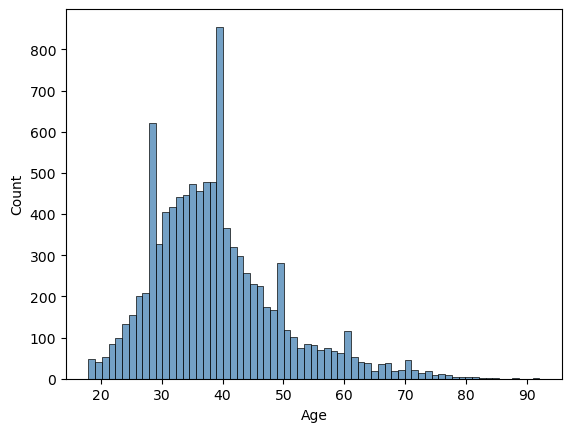

In [ ]:
desc = df_full[['Age', 'Gender', 'Geography', 'Tenure']].describe(include='all').T

# quick plot for Age distribution to get a visual idea
sns.histplot(
    data=df_full,
    x="Age",
    color="steelblue",
    edgecolor="black")
# checking for weird values of count > 600 
age_counts = df_full['Age'].value_counts() 
print(age_counts) #TODO. double check here odd 


# pas très parlant pour les non numericals, donc maybe like this will be better: 
gender_count = df_full["Gender"].value_counts()
print(gender_count) #more female left the bank 1139 vs 898
geo_distribution = df_full["Geography"].value_counts()
print(geo_distribution) #nbr of obs: France 5014, Germany 2509, Spain 2477




How do the different variables interact with each other?